In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import random
# import typing
import warnings
warnings.simplefilter('ignore', np.RankWarning)

In [123]:
# style
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = [10.24, 5.76]
rcParams['axes.titlepad'] = 25
rcParams['axes.titlesize'] = 15
rcParams['axes.titleweight'] = 700
rcParams['axes.labelpad'] = 25
rcParams['axes.labelsize'] = 14
rcParams['axes.labelweight'] = 700
rcParams['legend.fontsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.pad_inches'] = 0.35

In [124]:
def genNoisyLinearData(a: int, b: int, amountOfDots: int, xRange: int, sigma: int, seed: int) -> tuple:
    """
    Generates noise data (dots) around a line.

    Parameters:
    ----------
    a: slope of the line (how steep it is).
    b: intercept (where the line crosses the y-axis).
    amountOfDots: number of x/y pairs (dots on a scatter plot).
    xRange: maximum value on the x axes.
    sigma: how far the dots should vertically scatter from the line.
    seed: the seed for the random module.

    Returns:
    -------
    x and y values (tuple with two lists).
    """
    random.seed(seed)
    xVals = sorted([random.uniform(0, xRange) for i in range(amountOfDots)])
    yVals = [(a * x + b) + random.gauss(0, sigma) for x in xVals]
    return xVals, yVals

In [125]:
def genNoisyParabolicData(a: int, b: int, c: int, amountOfDots: int, xRange: int, sigma: int, seed: int) -> tuple:
    """
    Generates noise data (dots) around a parabola.

    Parameters:
    ----------
    a, b, c: parameters of the parabola equation.
    amountOfDots: number of x/y pairs (dots on a scatter plot).
    xRange: maximum value on the x axes.
    sigma: how far the dots should vertically scatter from the parabola.
    seed: the seed for the random module.

    Returns:
    -------
    x and y values (tuple with two lists).
    """
    random.seed(seed)
    xVals = sorted([random.uniform(-xRange, xRange + 1) for i in range(amountOfDots)])
    yVals = [(a * x**2 + b * x + c) + random.gauss(0, sigma) for x in xVals]
    return xVals, yVals

In [126]:
def rSquared(observed: list, predicted: list) -> float:
    """
    Calculates the R squared error (coefficient of determination).

    Parameters:
    ----------
    observed: observed y values.
    predicted: predicted y values.

    Returns:
    -------
    R squared error.
    """
    error = ((predicted - observed)**2).sum()
    meanError = error / len(observed)
    return 1 - (meanError / np.var(observed))

In [127]:
def plotScatter(xVals: list, yVals: list, xLabel: str, yLabel: str, dotSize: int) -> None:
    """
    Creates a scatter plot. It doesn't have plt.show() at the end.
    You need to declare it outside of this function where needed.

    Parameters:
    ----------
    xVals, yVals: lists of x and y values.
    xLabel, yLabel: x and y axes label strings.
    dotSize: the size of the dots on the scatter plot.
    """
    plt.scatter(xVals, yVals, s=dotSize)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

In [128]:
def plotLine(xVals: list, yVals: list) -> None:
    """
    Fits and plots a line in a randomly produced linear noisy data.

    Parameters:
    ----------
    xVals, yVal: x and y values.
    """    
    # returns the best fitted a and b in ax + b
    line_model = np.polyfit(xVals, yVals, 1)

    # estimated y values based on the line_model
    # estYVals = line_model[0] * x + line_model[1]
    estYVals = np.polyval(line_model, xVals)

    # plot the line
    plt.plot(xVals, estYVals, color='r', lw=1.2)

    # plot the error as text
    error = round(rSquared(yVals, estYVals), 3)
    plt.text(2, 110000, s=f'R² = {error}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=12, fontweight=700)

    # plot the scatter
    plotScatter(xVals, yVals, xLabel, yLabel, 80)
    
    # show the figure
    plt.show()

In [129]:
def plotPolynomials(xVals: list, yVals: list, degrees: list) -> None:
    """
    Fits and plots curves (polynomials with different degrees) 
    in separate figures in a randomly produced parabolic noisy data.
    
    Parameters:
    ----------
    xVals, yVal: x and y values.
    degrees: degrees of the polynomials to be fitted.
    """  
    for degree in degrees:
        # degree polynomial model
        model = np.polyfit(xVals, yVals, degree)

        # estimated y values based on the model
        estYVals = np.polyval(model, xVals)
    
        # create new figure
        plt.figure()
        
        # plot the polynomial
        plt.plot(xVals, estYVals, color='r', lw=1.2)

        # plot the degree as text
        plt.text(0, 270, s=f'degree = {degree}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=12, fontweight=700)
        
        # plot error as text
        error = round(rSquared(yVals, estYVals), 3)
        plt.text(0, 250, s=f'R² = {error}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=12, fontweight=700)

        # plot the scatter
        plotScatter(xVals, yVals, xLabel, yLabel, 80)
    
        # show the figure
        plt.show()

In [130]:
def plotPolynomialsTogether(xVals: list, yVals: list, degrees: list) -> None:
    """
    Serves the same purpose as plotPolynomials(xVals, yVals, degrees)
    but produces one figure with many subplots instead of many figures.
    """
    # set smaller x and y ticks font size
    rcParams['xtick.labelsize'] = 11
    rcParams['ytick.labelsize'] = 11
    
    # create a new figure
    fig = plt.figure()
    
    # rows and columns of the figure
    rows = len(degrees) // 2
    columns = len(degrees) - rows
    
    # loop through the list of degrees
    for i, degree in enumerate(degrees, 1):
        # degree polynomial model
        model = np.polyfit(xVals, yVals, degree)

        # estimated y values based on the model
        estYVals = np.polyval(model, xVals)
        
        # add subplot
        fig.add_subplot(rows, columns, i)

        # plot the polynomial
        plt.plot(xVals, estYVals, color='r', lw=1)

        # plot the degree as text
        plt.text(0, 270, s=f'degree = {degree}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=10, fontweight=700)
        
        # plot the error as text
        error = round(rSquared(yVals, estYVals), 3)
        plt.text(0, 235, s=f'R² = {error}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=10, fontweight=700)

        # plot the scatter
        plt.scatter(xVals, yVals, s=40)
    
    # show the figure
    plt.show()

In [131]:
def trainModels(xVals: list, yVals: list, degrees: list) -> list:
    """
    Fits curves (polynomials with different degrees).

    Parameters:
    ----------
    xVals, yVal: x and y values.
    degrees: degrees of the polynomials to be fitted.

    Returns:
    -------
    Models (fitted curves) for every degree (list made of lists).
    """
    return [np.polyfit(xVals, yVals, degree) for degree in degrees]

In [132]:
def evaluateModels(newXVals: list, newYVals: list, models: list) -> list:
    """
    Calculates the R squared error (coefficient of determination) for each model (degree).

    Parameters:
    ----------
    newXVals, newYVals: new x and y values.
    models: list of models (polynomials with different degrees).

    Returns:
    -------
    List of R squared errors (coefficients of determination).
    """
    errors = []
    for model in models:
        estYVals = np.polyval(model, newXVals)
        error = round(rSquared(newYVals, estYVals), 3)
        errors.append(error)
    return errors

In [133]:
# arguments for generating a noisy linear data
a, b, amountOfDots, dataRange, sigma, seed = 9450, 25792, 35, 12, 10000, 12
xVals, yVals = genNoisyLinearData(a, b, amountOfDots, dataRange, sigma, seed)

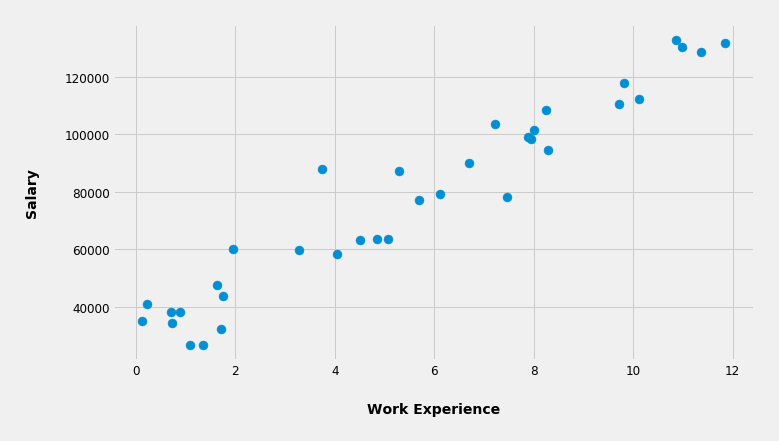

In [134]:
# plot the noisy linear data
xLabel, yLabel ='Work Experience', 'Salary'
plotScatter(xVals, yVals, xLabel, yLabel, 80)
plt.show()

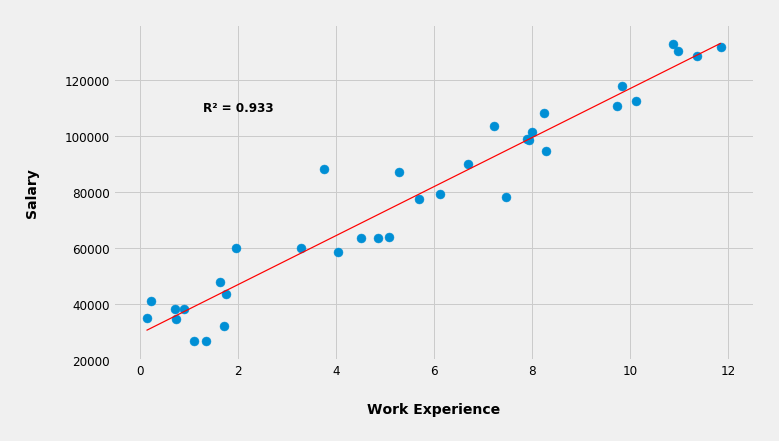

In [135]:
# plot one degree polynomial (a line)
plotLine(xVals, yVals)

In [136]:
# arguments for generating a noisy parabola
a, b, c, amountOfDots, dataRange, sigma, seed = 3, 0, 0, 35, 10, 40, 13
xVals, yVals = genNoisyParabolicData(a, b, c, amountOfDots, dataRange, sigma, seed)

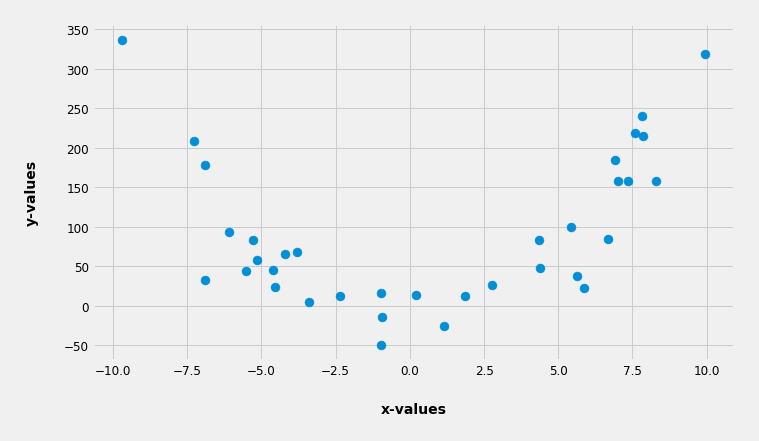

In [137]:
# plot the noisy parabolic data
xLabel, yLabel ='x-values', 'y-values'
plotScatter(xVals, yVals, xLabel, yLabel, 80)
plt.show()

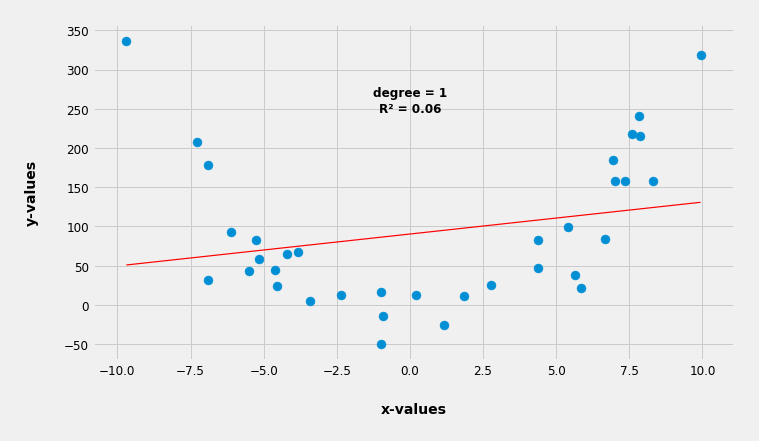

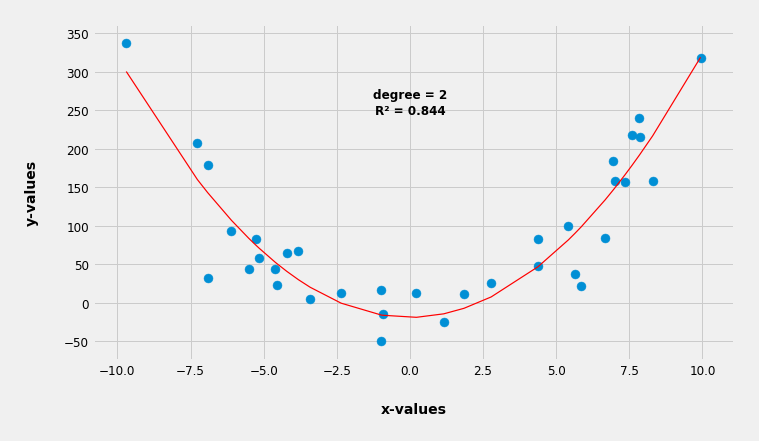

In [138]:
# plot one degree polynomial (a line) and a two degree polynomial (a parabola)
degrees = [1, 2]
plotPolynomials(xVals, yVals, degrees)

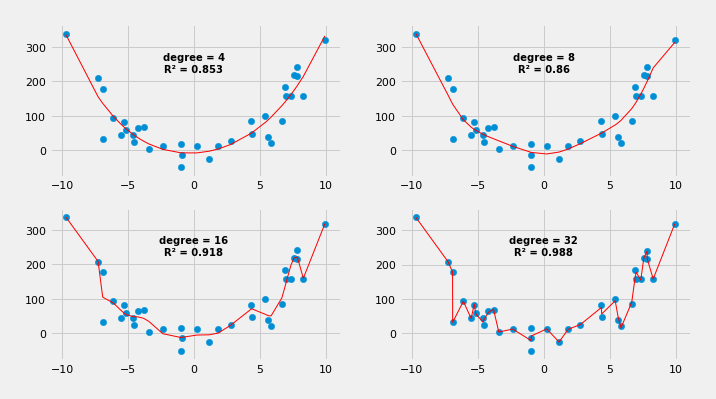

In [139]:
# plot polynomials with different degrees on one figure
degrees = [4, 8, 16, 32]
plotPolynomialsTogether(xVals, yVals, degrees)

In [140]:
# degrees of the polynomials
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# train models on old data
models = trainModels(xVals, yVals, degrees)

# generate new data (with dfifferent seed)
a, b, c, amountOfDots, xRange, sigma, seed = 3, 0, 0, 35, 10, 40, 18
newXVals, newYVals = genNoisyParabolicData(a, b, c, amountOfDots, xRange, sigma, seed)

# record the errors of the training data
training_data_errors = evaluateModels(xVals, yVals, models)

# record the errors of the new data
new_data_errors = evaluateModels(newXVals, newYVals, models)

In [141]:
# print out the differences in errors in training and new data
for i in range(len(degrees)):
    degree, tr_error, new_error = degrees[i], training_data_errors[i], new_data_errors[i]
    print(f'degree = {degree} | training data R² = {tr_error:.3f} | new data R² = {new_error:.3f}')

degree = 1 | training data R² = 0.060 | new data R² = 0.057
degree = 2 | training data R² = 0.844 | new data R² = 0.827
degree = 3 | training data R² = 0.846 | new data R² = 0.831
degree = 4 | training data R² = 0.853 | new data R² = 0.800
degree = 5 | training data R² = 0.855 | new data R² = 0.796
degree = 6 | training data R² = 0.856 | new data R² = 0.787
degree = 7 | training data R² = 0.857 | new data R² = 0.779
degree = 8 | training data R² = 0.860 | new data R² = 0.739
degree = 9 | training data R² = 0.876 | new data R² = 0.587


In [142]:
# !jupyter nbconvert --to script linear-regression.ipynb